In [199]:
# This notebook is a modified version of Lauren's "Verification of DBSCAN Output-version3" notebook
#import the different packages used throughout
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import xarray as xr
import datetime
import warnings
warnings.simplefilter("ignore")

In [200]:
#constants
a = 6.37E6 #m

In [43]:
#open the local copy of 50km clustering
f = xr.open_dataset('2009_01_050_Clustered_Data.nc4')
time = np.array(f.time)
vector = np.array(f.vector)
data = np.array(f.Data)
labels = np.array(f.Labels)
nclusters = np.max(labels) + 1
print(time.shape, vector.shape, data.shape, labels.shape)
numpixels = np.ndarray(shape=(nclusters), dtype=int)
for i in np.arange(nclusters):
    temp = np.zeros(np.size(labels))
    condition = labels-i == 0
    temp[condition] = 1
    numpixels[i] = np.sum(temp)
    
#compile event information: pixel times, latitudes, longitudes, rain rates, latent heating profiles
event50_time = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event50_lat = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event50_lon = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event50_pr = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event50_lhp = np.nan*np.zeros(shape=(nclusters,19,np.max(numpixels)), dtype=float)
temp_lhp = np.swapaxes(data[:,4:], 0, 1)
for i in np.arange(nclusters):
    print(i/nclusters)
    ind = np.int(numpixels[i])
    condition = labels-i == 0
    event50_time[i,:ind] = np.extract(condition, data[:,0])
    event50_lat[i,:ind] = np.extract(condition, data[:,1])
    event50_lon[i,:ind] = np.extract(condition, data[:,2])
    event50_pr[i,:ind] = np.extract(condition, data[:,3])
    condition = np.tile(condition, [19, 1])
    event50_lhp[i,:,:ind] = np.extract(condition, temp_lhp).reshape(19,ind)
    
# Calculate average quantities for the events, weighted by the cosine of latitude
temp = np.cos(np.pi*event50_lat/180)
event50_time_mean = np.squeeze(np.nansum(event50_time*temp, axis=1)/np.nansum(temp, axis=1))
event50_lat_mean = np.squeeze(np.nansum(event50_lat*temp, axis=1)/np.nansum(temp, axis=1))
event50_lon_mean = np.squeeze(np.nansum(event50_lon*temp, axis=1)/np.nansum(temp, axis=1))
event50_pr_mean = np.squeeze(np.nansum(event50_pr*temp, axis=1)/np.nansum(temp, axis=1))
temp = np.tile(temp, [19,1,1])
temp = np.swapaxes(temp, 0, 1)
event50_lhp_mean = np.squeeze(np.nansum(event50_lhp*temp, axis=2)/np.nansum(temp, axis=2))

# Calculate event area and total rainfall rate
dy = a*np.pi*0.05/(180*1000) #km
dx = a*np.pi*0.05*np.cos(np.pi*event50_lat/180)/(180*1000) #km
event50_area = np.nansum(dy*dx, axis=1)
event50_pr_total = event50_pr_mean*event50_area

(440888,) (23,) (440888, 23) (440888,)
0.0
0.00041203131437989287
0.0008240626287597857
0.0012360939431396785
0.0016481252575195715
0.0020601565718994645
0.002472187886279357
0.00288421920065925
0.003296250515039143
0.003708281829419036
0.004120313143798929
0.004532344458178822
0.004944375772558714
0.005356407086938607
0.0057684384013185
0.006180469715698393
0.006592501030078286
0.007004532344458179
0.007416563658838072
0.007828594973217964
0.008240626287597858
0.00865265760197775
0.009064688916357644
0.009476720230737536
0.009888751545117428
0.010300782859497322
0.010712814173877214
0.011124845488257108
0.011536876802637
0.011948908117016894
0.012360939431396786
0.01277297074577668
0.013185002060156572
0.013597033374536464
0.014009064688916358
0.01442109600329625
0.014833127317676144
0.015245158632056036
0.015657189946435928
0.016069221260815822
0.016481252575195716
0.016893283889575606
0.0173053152039555
0.017717346518335394
0.018129377832715288
0.018541409147095178
0.018953440461475

0.1685208075813762
0.16893283889575608
0.16934487021013597
0.16975690152451586
0.17016893283889575
0.17058096415327564
0.17099299546765553
0.17140502678203542
0.17181705809641531
0.17222908941079523
0.17264112072517512
0.173053152039555
0.1734651833539349
0.1738772146683148
0.17428924598269468
0.17470127729707458
0.17511330861145447
0.17552533992583436
0.17593737124021425
0.17634940255459414
0.17676143386897405
0.17717346518335395
0.17758549649773384
0.17799752781211373
0.17840955912649362
0.1788215904408735
0.1792336217552534
0.1796456530696333
0.18005768438401318
0.18046971569839307
0.18088174701277296
0.18129377832715288
0.18170580964153277
0.18211784095591266
0.18252987227029255
0.18294190358467244
0.18335393489905233
0.18376596621343222
0.1841779975278121
0.184590028842192
0.1850020601565719
0.18541409147095178
0.1858261227853317
0.1862381540997116
0.18665018541409148
0.18706221672847137
0.18747424804285126
0.18788627935723115
0.18829831067161104
0.18871034198599093
0.189122373300

0.3415739596209312
0.34198599093531107
0.34239802224969096
0.34281005356407085
0.34322208487845074
0.34363411619283063
0.3440461475072106
0.34445817882159047
0.34487021013597036
0.34528224145035025
0.34569427276473014
0.34610630407911
0.3465183353934899
0.3469303667078698
0.3473423980222497
0.3477544293366296
0.3481664606510095
0.34857849196538937
0.34899052327976926
0.34940255459414915
0.34981458590852904
0.35022661722290893
0.3506386485372888
0.3510506798516687
0.3514627111660486
0.3518747424804285
0.3522867737948084
0.3526988051091883
0.35311083642356816
0.3535228677379481
0.353934899052328
0.3543469303667079
0.3547589616810878
0.35517099299546767
0.35558302430984756
0.35599505562422745
0.35640708693860734
0.35681911825298723
0.3572311495673671
0.357643180881747
0.3580552121961269
0.3584672435105068
0.3588792748248867
0.3592913061392666
0.35970333745364647
0.36011536876802636
0.36052740008240625
0.36093943139678614
0.361351462711166
0.3617634940255459
0.3621755253399258
0.3625875566

0.5170992995467656
0.5175113308611454
0.5179233621755254
0.5183353934899052
0.5187474248042852
0.519159456118665
0.5195714874330449
0.5199835187474248
0.5203955500618047
0.5208075813761845
0.5212196126905645
0.5216316440049443
0.5220436753193243
0.5224557066337041
0.522867737948084
0.523279769262464
0.5236918005768438
0.5241038318912238
0.5245158632056036
0.5249278945199836
0.5253399258343634
0.5257519571487433
0.5261639884631232
0.5265760197775031
0.526988051091883
0.5274000824062629
0.5278121137206427
0.5282241450350227
0.5286361763494025
0.5290482076637825
0.5294602389781623
0.5298722702925422
0.5302843016069221
0.530696332921302
0.5311083642356819
0.5315203955500618
0.5319324268644416
0.5323444581788216
0.5327564894932015
0.5331685208075814
0.5335805521219613
0.5339925834363412
0.5344046147507211
0.5348166460651009
0.5352286773794809
0.5356407086938607
0.5360527400082407
0.5364647713226205
0.5368768026370004
0.5372888339513803
0.5377008652657602
0.53811289658014
0.53852492789452
0.

0.696332921302019
0.6967449526163988
0.6971569839307787
0.6975690152451587
0.6979810465595385
0.6983930778739185
0.6988051091882983
0.6992171405026782
0.6996291718170581
0.700041203131438
0.7004532344458179
0.7008652657601978
0.7012772970745776
0.7016893283889576
0.7021013597033374
0.7025133910177174
0.7029254223320972
0.7033374536464772
0.703749484960857
0.7041615162752369
0.7045735475896168
0.7049855789039967
0.7053976102183765
0.7058096415327565
0.7062216728471363
0.7066337041615163
0.7070457354758962
0.707457766790276
0.707869798104656
0.7082818294190358
0.7086938607334158
0.7091058920477956
0.7095179233621756
0.7099299546765554
0.7103419859909353
0.7107540173053152
0.7111660486196951
0.711578079934075
0.7119901112484549
0.7124021425628347
0.7128141738772147
0.7132262051915945
0.7136382365059745
0.7140502678203543
0.7144622991347342
0.7148743304491141
0.715286361763494
0.715698393077874
0.7161104243922538
0.7165224557066338
0.7169344870210136
0.7173465183353935
0.7177585496497734
0

0.8755665430572723
0.8759785743716523
0.8763906056860321
0.876802637000412
0.8772146683147919
0.8776266996291718
0.8780387309435517
0.8784507622579316
0.8788627935723115
0.8792748248866914
0.8796868562010712
0.8800988875154512
0.880510918829831
0.880922950144211
0.8813349814585909
0.8817470127729707
0.8821590440873507
0.8825710754017305
0.8829831067161105
0.8833951380304903
0.8838071693448702
0.8842192006592501
0.88463123197363
0.8850432632880099
0.8854552946023898
0.8858673259167696
0.8862793572311496
0.8866913885455294
0.8871034198599094
0.8875154511742892
0.8879274824886692
0.888339513803049
0.8887515451174289
0.8891635764318088
0.8895756077461887
0.8899876390605687
0.8903996703749485
0.8908117016893284
0.8912237330037083
0.8916357643180882
0.892047795632468
0.892459826946848
0.8928718582612278
0.8932838895756078
0.8936959208899876
0.8941079522043676
0.8945199835187474
0.8949320148331273
0.8953440461475072
0.8957560774618871
0.896168108776267
0.8965801400906469
0.8969921714050267
0.

In [44]:
#100km
f = xr.open_dataset('2009_01_100_Clustered_Data.nc4')
time = np.array(f.time)
vector = np.array(f.vector)
data = np.array(f.Data)
labels = np.array(f.Labels)
nclusters = np.max(labels) + 1
print(time.shape, vector.shape, data.shape, labels.shape)
numpixels = np.ndarray(shape=(nclusters), dtype=int)
for i in np.arange(nclusters):
    temp = np.zeros(np.size(labels))
    condition = labels-i == 0
    temp[condition] = 1
    numpixels[i] = np.sum(temp)
    
#compile event information: pixel times, latitudes, longitudes, rain rates, latent heating profiles
event100_time = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event100_lat = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event100_lon = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event100_pr = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event100_lhp = np.nan*np.zeros(shape=(nclusters,19,np.max(numpixels)), dtype=float)
temp_lhp = np.swapaxes(data[:,4:], 0, 1)
for i in np.arange(nclusters):
    print(i/nclusters)
    ind = np.int(numpixels[i])
    condition = labels-i == 0
    event100_time[i,:ind] = np.extract(condition, data[:,0])
    event100_lat[i,:ind] = np.extract(condition, data[:,1])
    event100_lon[i,:ind] = np.extract(condition, data[:,2])
    event100_pr[i,:ind] = np.extract(condition, data[:,3])
    condition = np.tile(condition, [19, 1])
    event100_lhp[i,:,:ind] = np.extract(condition, temp_lhp).reshape(19,ind)
    
# Calculate average quantities for the events, weighted by the cosine of latitude
temp = np.cos(np.pi*event100_lat/180)
event100_time_mean = np.squeeze(np.nansum(event100_time*temp, axis=1)/np.nansum(temp, axis=1))
event100_lat_mean = np.squeeze(np.nansum(event100_lat*temp, axis=1)/np.nansum(temp, axis=1))
event100_lon_mean = np.squeeze(np.nansum(event100_lon*temp, axis=1)/np.nansum(temp, axis=1))
event100_pr_mean = np.squeeze(np.nansum(event100_pr*temp, axis=1)/np.nansum(temp, axis=1))
temp = np.tile(temp, [19,1,1])
temp = np.swapaxes(temp, 0, 1)
event100_lhp_mean = np.squeeze(np.nansum(event100_lhp*temp, axis=2)/np.nansum(temp, axis=2))

# Calculate event area and total rainfall rate
dy = a*np.pi*0.05/(180*1000) #km
dx = a*np.pi*0.05*np.cos(np.pi*event100_lat/180)/(180*1000) #km
event100_area = np.nansum(dy*dx, axis=1)
event100_pr_total = event100_pr_mean*event100_area

(440790,) (23,) (440790, 23) (440790,)
0.0
0.0005112474437627812
0.0010224948875255625
0.0015337423312883436
0.002044989775051125
0.002556237218813906
0.003067484662576687
0.0035787321063394683
0.00408997955010225
0.004601226993865031
0.005112474437627812
0.005623721881390593
0.006134969325153374
0.0066462167689161555
0.007157464212678937
0.007668711656441718
0.0081799591002045
0.008691206543967281
0.009202453987730062
0.009713701431492843
0.010224948875255624
0.010736196319018405
0.011247443762781187
0.011758691206543968
0.012269938650306749
0.01278118609406953
0.013292433537832311
0.013803680981595092
0.014314928425357873
0.014826175869120654
0.015337423312883436
0.015848670756646217
0.016359918200409
0.01687116564417178
0.017382413087934562
0.01789366053169734
0.018404907975460124
0.018916155419222903
0.019427402862985686
0.019938650306748466
0.02044989775051125
0.020961145194274028
0.02147239263803681
0.02198364008179959
0.022494887525562373
0.023006134969325152
0.02351738241308793

0.20961145194274028
0.21012269938650308
0.21063394683026584
0.21114519427402864
0.2116564417177914
0.21216768916155418
0.21267893660531698
0.21319018404907975
0.21370143149284254
0.2142126789366053
0.2147239263803681
0.21523517382413088
0.21574642126789367
0.21625766871165644
0.2167689161554192
0.217280163599182
0.21779141104294478
0.21830265848670757
0.21881390593047034
0.21932515337423314
0.2198364008179959
0.22034764826175868
0.22085889570552147
0.22137014314928424
0.22188139059304704
0.2223926380368098
0.2229038854805726
0.22341513292433537
0.22392638036809817
0.22443762781186094
0.2249488752556237
0.2254601226993865
0.22597137014314927
0.22648261758691207
0.22699386503067484
0.22750511247443764
0.2280163599182004
0.2285276073619632
0.22903885480572597
0.22955010224948874
0.23006134969325154
0.2305725971370143
0.2310838445807771
0.23159509202453987
0.23210633946830267
0.23261758691206544
0.2331288343558282
0.233640081799591
0.23415132924335377
0.23466257668711657
0.2351738241308793

0.42535787321063395
0.42586912065439675
0.4263803680981595
0.4268916155419223
0.4274028629856851
0.4279141104294479
0.4284253578732106
0.4289366053169734
0.4294478527607362
0.42995910020449896
0.43047034764826175
0.43098159509202455
0.43149284253578735
0.4320040899795501
0.4325153374233129
0.4330265848670757
0.4335378323108384
0.4340490797546012
0.434560327198364
0.4350715746421268
0.43558282208588955
0.43609406952965235
0.43660531697341515
0.4371165644171779
0.4376278118609407
0.4381390593047035
0.4386503067484663
0.439161554192229
0.4396728016359918
0.4401840490797546
0.44069529652351735
0.44120654396728015
0.44171779141104295
0.44222903885480574
0.4427402862985685
0.4432515337423313
0.4437627811860941
0.4442740286298569
0.4447852760736196
0.4452965235173824
0.4458077709611452
0.44631901840490795
0.44683026584867075
0.44734151329243355
0.44785276073619634
0.4483640081799591
0.4488752556237219
0.4493865030674847
0.4498977505112474
0.4504089979550102
0.450920245398773
0.451431492842535

0.6462167689161554
0.6467280163599182
0.647239263803681
0.6477505112474438
0.6482617586912065
0.6487730061349694
0.6492842535787321
0.6497955010224948
0.6503067484662577
0.6508179959100204
0.6513292433537833
0.651840490797546
0.6523517382413088
0.6528629856850716
0.6533742331288344
0.6538854805725971
0.65439672801636
0.6549079754601227
0.6554192229038854
0.6559304703476483
0.656441717791411
0.6569529652351738
0.6574642126789366
0.6579754601226994
0.6584867075664622
0.658997955010225
0.6595092024539877
0.6600204498977505
0.6605316973415133
0.661042944785276
0.6615541922290389
0.6620654396728016
0.6625766871165644
0.6630879345603272
0.66359918200409
0.6641104294478528
0.6646216768916156
0.6651329243353783
0.6656441717791411
0.6661554192229039
0.6666666666666666
0.6671779141104295
0.6676891615541922
0.668200408997955
0.6687116564417178
0.6692229038854806
0.6697341513292433
0.6702453987730062
0.6707566462167689
0.6712678936605317
0.6717791411042945
0.6722903885480572
0.6728016359918201
0.6

0.8686094069529653
0.869120654396728
0.8696319018404908
0.8701431492842536
0.8706543967280164
0.8711656441717791
0.871676891615542
0.8721881390593047
0.8726993865030674
0.8732106339468303
0.873721881390593
0.8742331288343558
0.8747443762781186
0.8752556237218814
0.8757668711656442
0.876278118609407
0.8767893660531697
0.8773006134969326
0.8778118609406953
0.878323108384458
0.8788343558282209
0.8793456032719836
0.8798568507157464
0.8803680981595092
0.880879345603272
0.8813905930470347
0.8819018404907976
0.8824130879345603
0.8829243353783232
0.8834355828220859
0.8839468302658486
0.8844580777096115
0.8849693251533742
0.885480572597137
0.8859918200408998
0.8865030674846626
0.8870143149284253
0.8875255623721882
0.8880368098159509
0.8885480572597138
0.8890593047034765
0.8895705521472392
0.8900817995910021
0.8905930470347648
0.8911042944785276
0.8916155419222904
0.8921267893660532
0.8926380368098159
0.8931492842535788
0.8936605316973415
0.8941717791411042
0.8946830265848671
0.8951942740286298


In [45]:
#150km
f = xr.open_dataset('2009_01_150_Clustered_Data.nc4')
time = np.array(f.time)
vector = np.array(f.vector)
data = np.array(f.Data)
labels = np.array(f.Labels)
nclusters = np.max(labels) + 1
print(time.shape, vector.shape, data.shape, labels.shape)
numpixels = np.ndarray(shape=(nclusters), dtype=int)
for i in np.arange(nclusters):
    temp = np.zeros(np.size(labels))
    condition = labels-i == 0
    temp[condition] = 1
    numpixels[i] = np.sum(temp)
    
#compile event information: pixel times, latitudes, longitudes, rain rates, latent heating profiles
event150_time = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event150_lat = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event150_lon = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event150_pr = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event150_lhp = np.nan*np.zeros(shape=(nclusters,19,np.max(numpixels)), dtype=float)
temp_lhp = np.swapaxes(data[:,4:], 0, 1)
for i in np.arange(nclusters):
    print(i/nclusters)
    ind = np.int(numpixels[i])
    condition = labels-i == 0
    event150_time[i,:ind] = np.extract(condition, data[:,0])
    event150_lat[i,:ind] = np.extract(condition, data[:,1])
    event150_lon[i,:ind] = np.extract(condition, data[:,2])
    event150_pr[i,:ind] = np.extract(condition, data[:,3])
    condition = np.tile(condition, [19, 1])
    event150_lhp[i,:,:ind] = np.extract(condition, temp_lhp).reshape(19,ind)
    
# Calculate average quantities for the events, weighted by the cosine of latitude
temp = np.cos(np.pi*event150_lat/180)
event150_time_mean = np.squeeze(np.nansum(event150_time*temp, axis=1)/np.nansum(temp, axis=1))
event150_lat_mean = np.squeeze(np.nansum(event150_lat*temp, axis=1)/np.nansum(temp, axis=1))
event150_lon_mean = np.squeeze(np.nansum(event150_lon*temp, axis=1)/np.nansum(temp, axis=1))
event150_pr_mean = np.squeeze(np.nansum(event150_pr*temp, axis=1)/np.nansum(temp, axis=1))
temp = np.tile(temp, [19,1,1])
temp = np.swapaxes(temp, 0, 1)
event150_lhp_mean = np.squeeze(np.nansum(event150_lhp*temp, axis=2)/np.nansum(temp, axis=2))

# Calculate event area and total rainfall rate
dy = a*np.pi*0.05/(180*1000) #km
dx = a*np.pi*0.05*np.cos(np.pi*event150_lat/180)/(180*1000) #km
event150_area = np.nansum(dy*dx, axis=1)
event150_pr_total = event150_pr_mean*event150_area

(440753,) (23,) (440753, 23) (440753,)
0.0
0.000628140703517588
0.001256281407035176
0.0018844221105527637
0.002512562814070352
0.00314070351758794
0.0037688442211055275
0.0043969849246231155
0.005025125628140704
0.005653266331658292
0.00628140703517588
0.006909547738693468
0.007537688442211055
0.008165829145728644
0.008793969849246231
0.009422110552763818
0.010050251256281407
0.010678391959798994
0.011306532663316583
0.01193467336683417
0.01256281407035176
0.013190954773869347
0.013819095477386936
0.014447236180904523
0.01507537688442211
0.015703517587939697
0.016331658291457288
0.016959798994974875
0.017587939698492462
0.01821608040201005
0.018844221105527637
0.019472361809045227
0.020100502512562814
0.0207286432160804
0.02135678391959799
0.02198492462311558
0.022613065326633167
0.023241206030150754
0.02386934673366834
0.024497487437185928
0.02512562814070352
0.025753768844221106
0.026381909547738693
0.02701005025125628
0.02763819095477387
0.028266331658291458
0.028894472361809045
0.

0.2594221105527638
0.2600502512562814
0.26067839195979897
0.2613065326633166
0.2619346733668342
0.26256281407035176
0.26319095477386933
0.2638190954773869
0.26444723618090454
0.2650753768844221
0.2657035175879397
0.2663316582914573
0.26695979899497485
0.2675879396984925
0.26821608040201006
0.26884422110552764
0.2694723618090452
0.2701005025125628
0.2707286432160804
0.271356783919598
0.2719849246231156
0.27261306532663315
0.27324120603015073
0.27386934673366836
0.27449748743718594
0.2751256281407035
0.2757537688442211
0.27638190954773867
0.2770100502512563
0.2776381909547739
0.27826633165829145
0.27889447236180903
0.2795226130653266
0.28015075376884424
0.2807788944723618
0.2814070351758794
0.28203517587939697
0.28266331658291455
0.2832914572864322
0.28391959798994976
0.28454773869346733
0.2851758793969849
0.2858040201005025
0.2864321608040201
0.2870603015075377
0.2876884422110553
0.28831658291457285
0.2889447236180904
0.28957286432160806
0.29020100502512564
0.2908291457286432
0.29145728

0.5270100502512562
0.5276381909547738
0.5282663316582915
0.5288944723618091
0.5295226130653267
0.5301507537688442
0.5307788944723618
0.5314070351758794
0.532035175879397
0.5326633165829145
0.5332914572864321
0.5339195979899497
0.5345477386934674
0.535175879396985
0.5358040201005025
0.5364321608040201
0.5370603015075377
0.5376884422110553
0.5383165829145728
0.5389447236180904
0.539572864321608
0.5402010050251256
0.5408291457286433
0.5414572864321608
0.5420854271356784
0.542713567839196
0.5433417085427136
0.5439698492462312
0.5445979899497487
0.5452261306532663
0.5458542713567839
0.5464824120603015
0.5471105527638191
0.5477386934673367
0.5483668341708543
0.5489949748743719
0.5496231155778895
0.550251256281407
0.5508793969849246
0.5515075376884422
0.5521356783919598
0.5527638190954773
0.553391959798995
0.5540201005025126
0.5546482412060302
0.5552763819095478
0.5559045226130653
0.5565326633165829
0.5571608040201005
0.5577889447236181
0.5584170854271356
0.5590452261306532
0.5596733668341709

0.8008793969849246
0.8015075376884422
0.8021356783919598
0.8027638190954773
0.803391959798995
0.8040201005025126
0.8046482412060302
0.8052763819095478
0.8059045226130653
0.8065326633165829
0.8071608040201005
0.8077889447236181
0.8084170854271356
0.8090452261306532
0.8096733668341709
0.8103015075376885
0.8109296482412061
0.8115577889447236
0.8121859296482412
0.8128140703517588
0.8134422110552764
0.8140703517587939
0.8146984924623115
0.8153266331658291
0.8159547738693468
0.8165829145728644
0.8172110552763819
0.8178391959798995
0.8184673366834171
0.8190954773869347
0.8197236180904522
0.8203517587939698
0.8209798994974874
0.821608040201005
0.8222361809045227
0.8228643216080402
0.8234924623115578
0.8241206030150754
0.824748743718593
0.8253768844221105
0.8260050251256281
0.8266331658291457
0.8272613065326633
0.8278894472361809
0.8285175879396985
0.8291457286432161
0.8297738693467337
0.8304020100502513
0.8310301507537688
0.8316582914572864
0.832286432160804
0.8329145728643216
0.83354271356783

In [46]:
#200km
f = xr.open_dataset('2009_01_200_Clustered_Data.nc4')
time = np.array(f.time)
vector = np.array(f.vector)
data = np.array(f.Data)
labels = np.array(f.Labels)
nclusters = np.max(labels) + 1
print(time.shape, vector.shape, data.shape, labels.shape)
numpixels = np.ndarray(shape=(nclusters), dtype=int)
for i in np.arange(nclusters):
    temp = np.zeros(np.size(labels))
    condition = labels-i == 0
    temp[condition] = 1
    numpixels[i] = np.sum(temp)
    
#compile event information: pixel times, latitudes, longitudes, rain rates, latent heating profiles
event200_time = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event200_lat = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event200_lon = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event200_pr = np.nan*np.zeros(shape=(nclusters,np.max(numpixels)), dtype=float)
event200_lhp = np.nan*np.zeros(shape=(nclusters,19,np.max(numpixels)), dtype=float)
temp_lhp = np.swapaxes(data[:,4:], 0, 1)
for i in np.arange(nclusters):
    print(i/nclusters)
    ind = np.int(numpixels[i])
    condition = labels-i == 0
    event200_time[i,:ind] = np.extract(condition, data[:,0])
    event200_lat[i,:ind] = np.extract(condition, data[:,1])
    event200_lon[i,:ind] = np.extract(condition, data[:,2])
    event200_pr[i,:ind] = np.extract(condition, data[:,3])
    condition = np.tile(condition, [19, 1])
    event200_lhp[i,:,:ind] = np.extract(condition, temp_lhp).reshape(19,ind)
    
# Calculate average quantities for the events, weighted by the cosine of latitude
temp = np.cos(np.pi*event200_lat/180)
event200_time_mean = np.squeeze(np.nansum(event200_time*temp, axis=1)/np.nansum(temp, axis=1))
event200_lat_mean = np.squeeze(np.nansum(event200_lat*temp, axis=1)/np.nansum(temp, axis=1))
event200_lon_mean = np.squeeze(np.nansum(event200_lon*temp, axis=1)/np.nansum(temp, axis=1))
event200_pr_mean = np.squeeze(np.nansum(event200_pr*temp, axis=1)/np.nansum(temp, axis=1))
temp = np.tile(temp, [19,1,1])
temp = np.swapaxes(temp, 0, 1)
event200_lhp_mean = np.squeeze(np.nansum(event200_lhp*temp, axis=2)/np.nansum(temp, axis=2))

# Calculate event area and total rainfall rate
dy = a*np.pi*0.05/(180*1000) #km
dx = a*np.pi*0.05*np.cos(np.pi*event200_lat/180)/(180*1000) #km
event200_area = np.nansum(dy*dx, axis=1)
event200_pr_total = event200_pr_mean*event200_area

(440737,) (23,) (440737, 23) (440737,)
0.0
0.000778816199376947
0.001557632398753894
0.002336448598130841
0.003115264797507788
0.003894080996884735
0.004672897196261682
0.005451713395638629
0.006230529595015576
0.007009345794392523
0.00778816199376947
0.008566978193146417
0.009345794392523364
0.010124610591900311
0.010903426791277258
0.011682242990654205
0.012461059190031152
0.0132398753894081
0.014018691588785047
0.014797507788161994
0.01557632398753894
0.016355140186915886
0.017133956386292833
0.01791277258566978
0.018691588785046728
0.019470404984423675
0.020249221183800622
0.02102803738317757
0.021806853582554516
0.022585669781931463
0.02336448598130841
0.024143302180685357
0.024922118380062305
0.02570093457943925
0.0264797507788162
0.027258566978193146
0.028037383177570093
0.02881619937694704
0.029595015576323987
0.030373831775700934
0.03115264797507788
0.031931464174454825
0.03271028037383177
0.03348909657320872
0.03426791277258567
0.035046728971962614
0.03582554517133956
0.03660

0.32242990654205606
0.32320872274143303
0.32398753894080995
0.3247663551401869
0.32554517133956384
0.3263239875389408
0.32710280373831774
0.3278816199376947
0.32866043613707163
0.3294392523364486
0.3302180685358255
0.3309968847352025
0.3317757009345794
0.3325545171339564
0.3333333333333333
0.3341121495327103
0.3348909657320872
0.3356697819314642
0.3364485981308411
0.3372274143302181
0.338006230529595
0.338785046728972
0.3395638629283489
0.34034267912772587
0.3411214953271028
0.34190031152647976
0.3426791277258567
0.34345794392523366
0.3442367601246106
0.34501557632398755
0.34579439252336447
0.34657320872274144
0.34735202492211836
0.34813084112149534
0.34890965732087226
0.34968847352024923
0.35046728971962615
0.3512461059190031
0.35202492211838005
0.352803738317757
0.35358255451713394
0.3543613707165109
0.35514018691588783
0.3559190031152648
0.35669781931464173
0.3574766355140187
0.3582554517133956
0.3590342679127726
0.3598130841121495
0.3605919003115265
0.3613707165109034
0.36214953271

0.6565420560747663
0.6573208722741433
0.6580996884735203
0.6588785046728972
0.6596573208722741
0.660436137071651
0.6612149532710281
0.661993769470405
0.6627725856697819
0.6635514018691588
0.6643302180685359
0.6651090342679128
0.6658878504672897
0.6666666666666666
0.6674454828660437
0.6682242990654206
0.6690031152647975
0.6697819314641744
0.6705607476635514
0.6713395638629284
0.6721183800623053
0.6728971962616822
0.6736760124610592
0.6744548286604362
0.6752336448598131
0.67601246105919
0.676791277258567
0.677570093457944
0.6783489096573209
0.6791277258566978
0.6799065420560748
0.6806853582554517
0.6814641744548287
0.6822429906542056
0.6830218068535826
0.6838006230529595
0.6845794392523364
0.6853582554517134
0.6861370716510904
0.6869158878504673
0.6876947040498442
0.6884735202492211
0.6892523364485982
0.6900311526479751
0.690809968847352
0.6915887850467289
0.692367601246106
0.6931464174454829
0.6939252336448598
0.6947040498442367
0.6954828660436138
0.6962616822429907
0.6970404984423676
0

0.9953271028037384
0.9961059190031153
0.9968847352024922
0.9976635514018691
0.9984423676012462
0.9992211838006231


In [77]:
# Save event mean information
cluster50 = np.arange(np.size(event50_time, axis=0))
pixel50 = np.arange(np.size(event50_time, axis=1))
cluster100 = np.arange(np.size(event100_time, axis=0))
pixel100 = np.arange(np.size(event100_time, axis=1))
cluster150 = np.arange(np.size(event150_time, axis=0))
pixel150 = np.arange(np.size(event150_time, axis=1))
cluster200 = np.arange(np.size(event200_time, axis=0))
pixel200 = np.arange(np.size(event200_time, axis=1))
lhp_level = np.arange(19)

event_means = xr.Dataset(
    data_vars={'event50_time_mean':(('cluster50'), event50_time_mean),
               'event50_lat_mean':(('cluster50'), event50_lat_mean),
               'event50_lon_mean':(('cluster50'), event50_lon_mean),
               'event50_pr_mean':(('cluster50'), event50_pr_mean),
               'event50_lhp_mean':(('cluster50', 'lhp_level'), event50_lhp_mean),
               'event50_area':(('cluster50'), event50_area),
               'event50_pr_total':(('cluster50'), event50_pr_total),
               'event100_time_mean':(('cluster100'), event100_time_mean),
               'event100_lat_mean':(('cluster100'), event100_lat_mean),
               'event100_lon_mean':(('cluster100'), event100_lon_mean),
               'event100_pr_mean':(('cluster100'), event100_pr_mean),
               'event100_lhp_mean':(('cluster100', 'lhp_level'), event100_lhp_mean),
               'event100_area':(('cluster100'), event100_area),
               'event100_pr_total':(('cluster100'), event100_pr_total),
               'event150_time_mean':(('cluster150'), event150_time_mean),
               'event150_lat_mean':(('cluster150'), event150_lat_mean),
               'event150_lon_mean':(('cluster150'), event150_lon_mean),
               'event150_pr_mean':(('cluster150'), event150_pr_mean),
               'event150_lhp_mean':(('cluster150', 'lhp_level'), event150_lhp_mean),
               'event150_area':(('cluster150'), event150_area),
               'event150_pr_total':(('cluster150'), event150_pr_total),
               'event200_time_mean':(('cluster200'), event200_time_mean),
               'event200_lat_mean':(('cluster200'), event200_lat_mean),
               'event200_lon_mean':(('cluster200'), event200_lon_mean),
               'event200_pr_mean':(('cluster200'), event200_pr_mean),
               'event200_lhp_mean':(('cluster200', 'lhp_level'), event200_lhp_mean),
               'event200_area':(('cluster200'), event200_area),
               'event200_pr_total':(('cluster200'), event200_pr_total)},
     coords={'cluster50': cluster50,
             'cluster100': cluster100,
             'cluster150': cluster150,
             'cluster200': cluster200,
             'lhp_level': lhp_level})
xr.Dataset.to_netcdf(event_means,'event_means.nc', mode='w', format = 'NETCDF4')

In [78]:
# Save event pixel information
cluster50 = np.arange(np.size(event50_time, axis=0))
pixel50 = np.arange(np.size(event50_time, axis=1))
cluster100 = np.arange(np.size(event100_time, axis=0))
pixel100 = np.arange(np.size(event100_time, axis=1))
cluster150 = np.arange(np.size(event150_time, axis=0))
pixel150 = np.arange(np.size(event150_time, axis=1))
cluster200 = np.arange(np.size(event200_time, axis=0))
pixel200 = np.arange(np.size(event200_time, axis=1))
lhp_level = np.arange(19)

event_pixels = xr.Dataset(
    data_vars={'event50_time':(('cluster50', 'pixel50'), event50_time),
               'event50_lat':(('cluster50', 'pixel50'), event50_lat),
               'event50_lon':(('cluster50', 'pixel50'), event50_lon),
               'event50_pr':(('cluster50', 'pixel50'), event50_pr),
               'event50_lhp':(('cluster50', 'lhp_level', 'pixel50'), event50_lhp),
               'event100_time':(('cluster100', 'pixel100'), event100_time),
               'event100_lat':(('cluster100', 'pixel100'), event100_lat),
               'event100_lon':(('cluster100', 'pixel100'), event100_lon),
               'event100_pr':(('cluster100', 'pixel100'), event100_pr),
               'event100_lhp':(('cluster100', 'lhp_level', 'pixel100'), event100_lhp),
               'event150_time':(('cluster150', 'pixel150'), event150_time),
               'event150_lat':(('cluster150', 'pixel150'), event150_lat),
               'event150_lon':(('cluster150', 'pixel150'), event150_lon),
               'event150_pr':(('cluster150', 'pixel150'), event150_pr),
               'event150_lhp':(('cluster150', 'lhp_level', 'pixel150'), event150_lhp),
               'event200_time':(('cluster200', 'pixel200'), event200_time),
               'event200_lat':(('cluster200', 'pixel200'), event200_lat),
               'event200_lon':(('cluster200', 'pixel200'), event200_lon),
               'event200_pr':(('cluster200', 'pixel200'), event200_pr),
               'event200_lhp':(('cluster200', 'lhp_level', 'pixel200'), event200_lhp)},
     coords={'cluster50': cluster50,
             'pixel50': pixel50,
             'cluster100': cluster100,
             'pixel100': pixel100,
             'cluster150': cluster150,
             'pixel150': pixel150,
             'cluster200': cluster200,
             'pixel200': pixel200,
             'lhp_level': lhp_level})
xr.Dataset.to_netcdf(event_pixels,'event_pixels.nc', mode='w', format = 'NETCDF4')

In [201]:
# Load in events
f = xr.open_dataset('event_pixels.nc')
event50_time = np.array(f.event50_time)
event50_lat = np.array(f.event50_lat)
event50_lon = np.array(f.event50_lon)
event50_pr = np.array(f.event50_pr)
event50_lhp = np.array(f.event50_lhp)
event100_time = np.array(f.event100_time)
event100_lat = np.array(f.event100_lat)
event100_lon = np.array(f.event100_lon)
event100_pr = np.array(f.event100_pr)
event100_lhp = np.array(f.event100_lhp)
event150_time = np.array(f.event150_time)
event150_lat = np.array(f.event150_lat)
event150_lon = np.array(f.event150_lon)
event150_pr = np.array(f.event150_pr)
event150_lhp = np.array(f.event150_lhp)
event200_time = np.array(f.event200_time)
event200_lat = np.array(f.event200_lat)
event200_lon = np.array(f.event200_lon)
event200_pr = np.array(f.event200_pr)
event200_lhp = np.array(f.event200_lhp)

f = xr.open_dataset('event_means.nc')
event50_time_mean = np.array(f.event50_time_mean)
event50_lat_mean = np.array(f.event50_lat_mean)
event50_lon_mean = np.array(f.event50_lon_mean)
event50_pr_mean = np.array(f.event50_pr_mean)
event50_lhp_mean = np.array(f.event50_lhp_mean)
event50_area = np.array(f.event50_area)
event50_pr_total = np.array(f.event50_pr_total)
event100_time_mean = np.array(f.event100_time_mean)
event100_lat_mean = np.array(f.event100_lat_mean)
event100_lon_mean = np.array(f.event100_lon_mean)
event100_pr_mean = np.array(f.event100_pr_mean)
event100_lhp_mean = np.array(f.event100_lhp_mean)
event100_area = np.array(f.event100_area)
event100_pr_total = np.array(f.event100_pr_total)
event150_time_mean = np.array(f.event150_time_mean)
event150_lat_mean = np.array(f.event150_lat_mean)
event150_lon_mean = np.array(f.event150_lon_mean)
event150_pr_mean = np.array(f.event150_pr_mean)
event150_lhp_mean = np.array(f.event150_lhp_mean)
event150_area = np.array(f.event150_area)
event150_pr_total = np.array(f.event150_pr_total)
event200_time_mean = np.array(f.event200_time_mean)
event200_lat_mean = np.array(f.event200_lat_mean)
event200_lon_mean = np.array(f.event200_lon_mean)
event200_pr_mean = np.array(f.event200_pr_mean)
event200_lhp_mean = np.array(f.event200_lhp_mean)
event200_area = np.array(f.event200_area)
event200_pr_total = np.array(f.event200_pr_total)

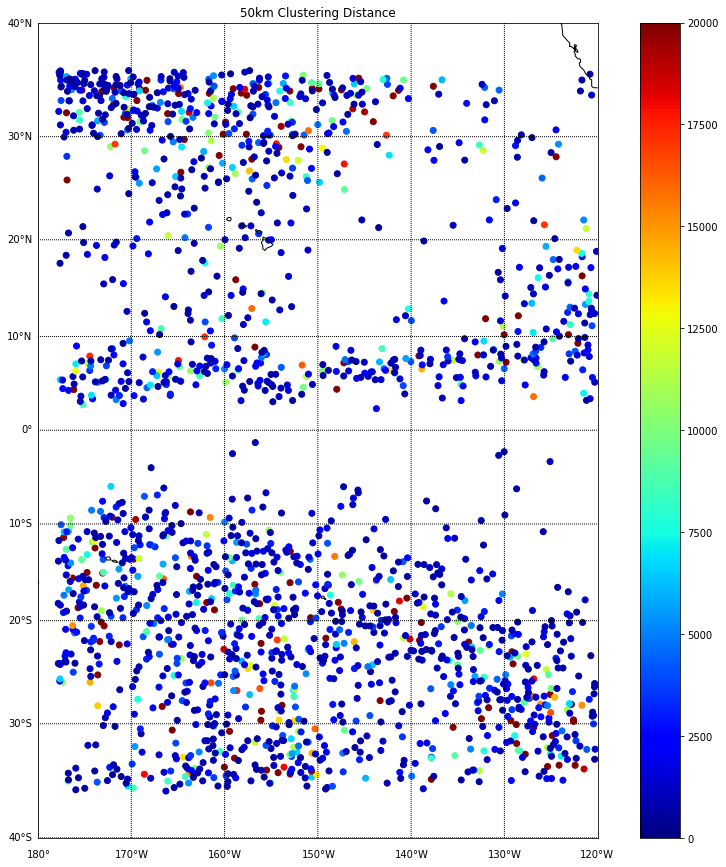

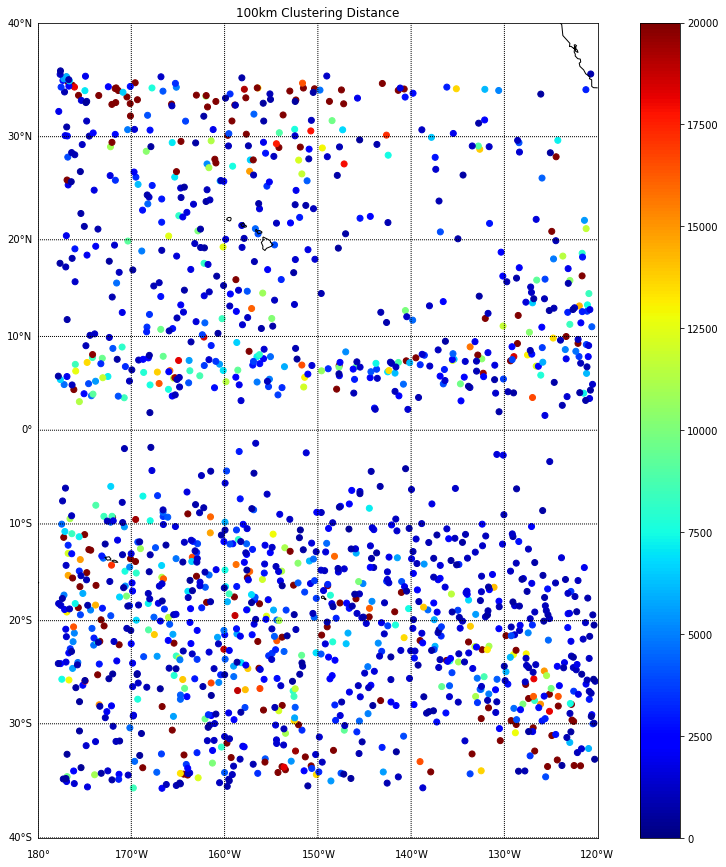

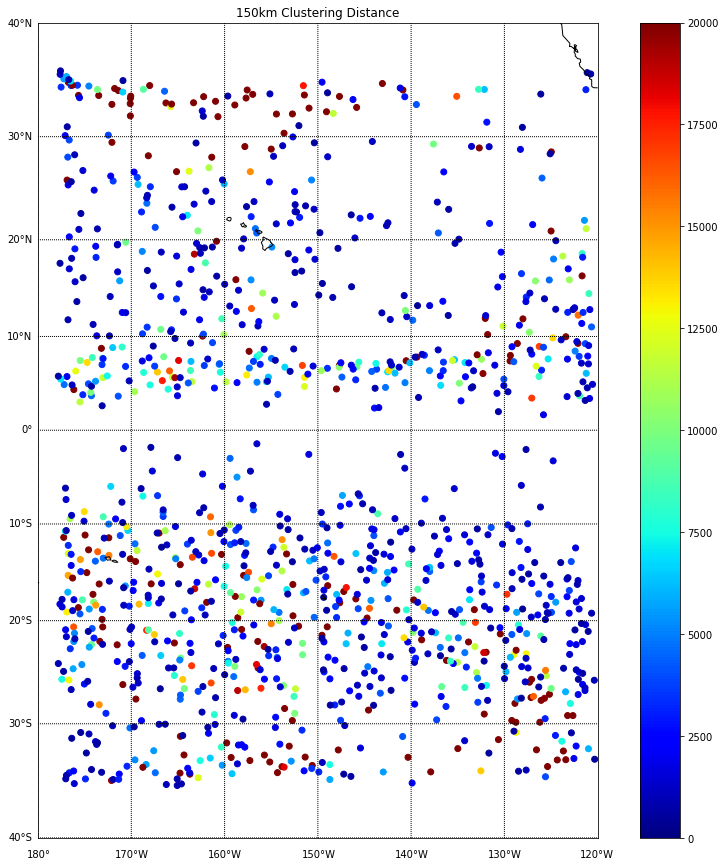

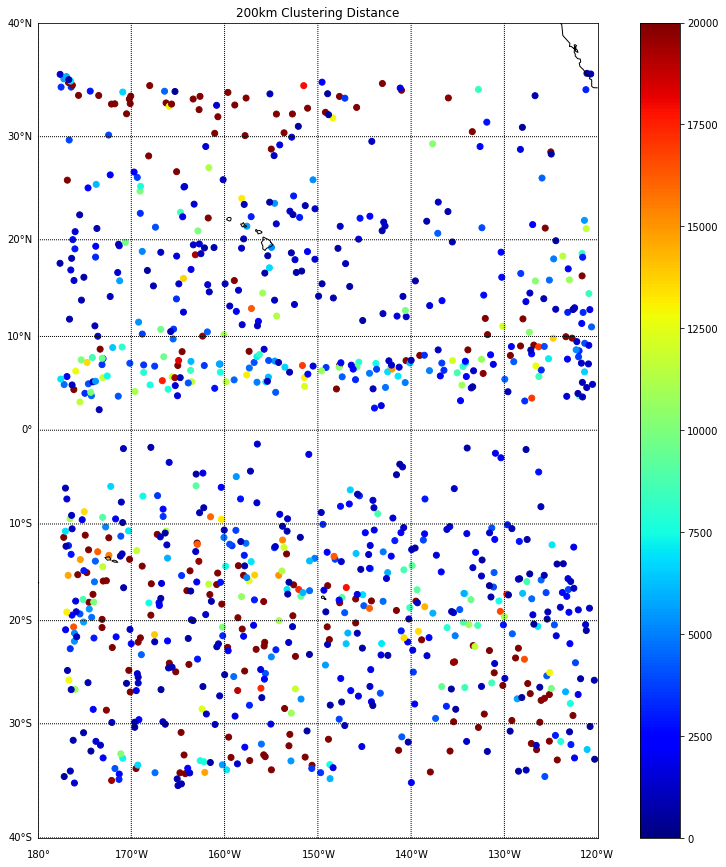

In [202]:
# Plot the event mean locations
areamin = 0
areamax = 20000

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(event50_lon_mean, event50_lat_mean)
m.scatter(x, y, c=event50_area, cmap=plt.cm.get_cmap('jet'))
plt.title('50km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(event100_lon_mean, event100_lat_mean)
m.scatter(x, y, c=event100_area, cmap=plt.cm.get_cmap('jet'))
plt.title('100km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(event150_lon_mean, event150_lat_mean)
m.scatter(x, y, c=event150_area, cmap=plt.cm.get_cmap('jet'))
plt.title('150km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(event200_lon_mean, event200_lat_mean)
m.scatter(x, y, c=event200_area, cmap=plt.cm.get_cmap('jet'))
plt.title('200km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

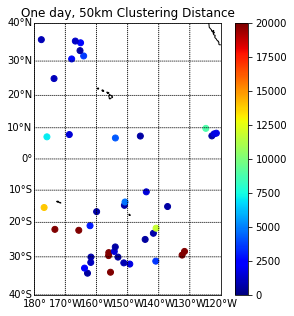

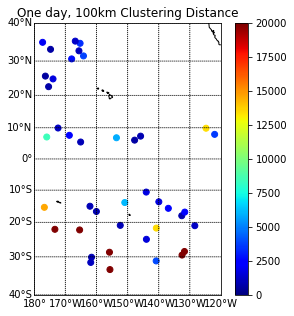

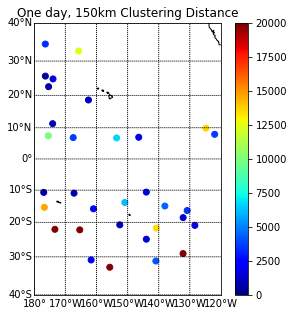

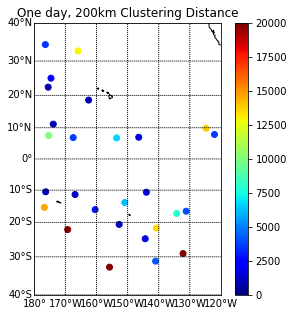

In [213]:
# Plot the event mean locations for a particular day
areamin = 0
areamax = 20000
time_desired = 300

# Find data within 12 hours of either side of that time (I think the time units are hours)
x_temp = event50_lon_mean
y_temp = event50_lat_mean
z_temp = event50_area
time_temp = event50_time_mean
condition = abs(time_desired - time_temp) <= 12
x_temp = np.extract(condition, x_temp)
y_temp = np.extract(condition, y_temp)
z_temp = np.extract(condition, z_temp)
fig = plt.figure(num=None, figsize=(5, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(x_temp, y_temp)
m.scatter(x, y, c=z_temp, cmap=plt.cm.get_cmap('jet'))
plt.title('One day, 50km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

x_temp = event100_lon_mean
y_temp = event100_lat_mean
z_temp = event100_area
time_temp = event100_time_mean
condition = abs(time_desired - time_temp) <= 12
x_temp = np.extract(condition, x_temp)
y_temp = np.extract(condition, y_temp)
z_temp = np.extract(condition, z_temp)
fig = plt.figure(num=None, figsize=(5, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(x_temp, y_temp)
m.scatter(x, y, c=z_temp, cmap=plt.cm.get_cmap('jet'))
plt.title('One day, 100km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

x_temp = event150_lon_mean
y_temp = event150_lat_mean
z_temp = event150_area
time_temp = event150_time_mean
condition = abs(time_desired - time_temp) <= 12
x_temp = np.extract(condition, x_temp)
y_temp = np.extract(condition, y_temp)
z_temp = np.extract(condition, z_temp)
fig = plt.figure(num=None, figsize=(5, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(x_temp, y_temp)
m.scatter(x, y, c=z_temp, cmap=plt.cm.get_cmap('jet'))
plt.title('One day, 150km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

x_temp = event200_lon_mean
y_temp = event200_lat_mean
z_temp = event200_area
time_temp = event200_time_mean
condition = abs(time_desired - time_temp) <= 12
x_temp = np.extract(condition, x_temp)
y_temp = np.extract(condition, y_temp)
z_temp = np.extract(condition, z_temp)
fig = plt.figure(num=None, figsize=(5, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
x, y = m(x_temp, y_temp)
m.scatter(x, y, c=z_temp, cmap=plt.cm.get_cmap('jet'))
plt.title('One day, 200km Clustering Distance')
plt.clim(areamin, areamax)
plt.colorbar();

Text(0.5, 1.0, 'One day, 200km Clustering Distance')

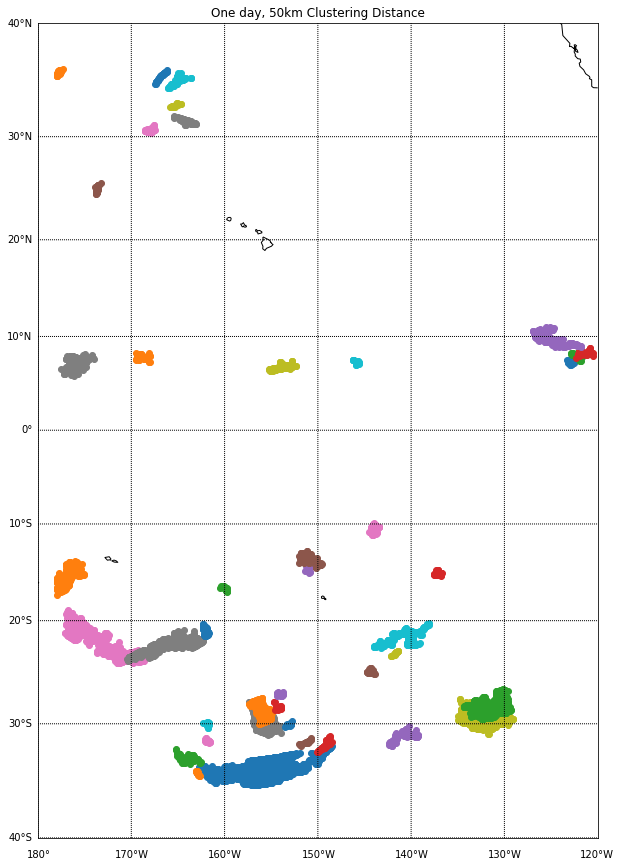

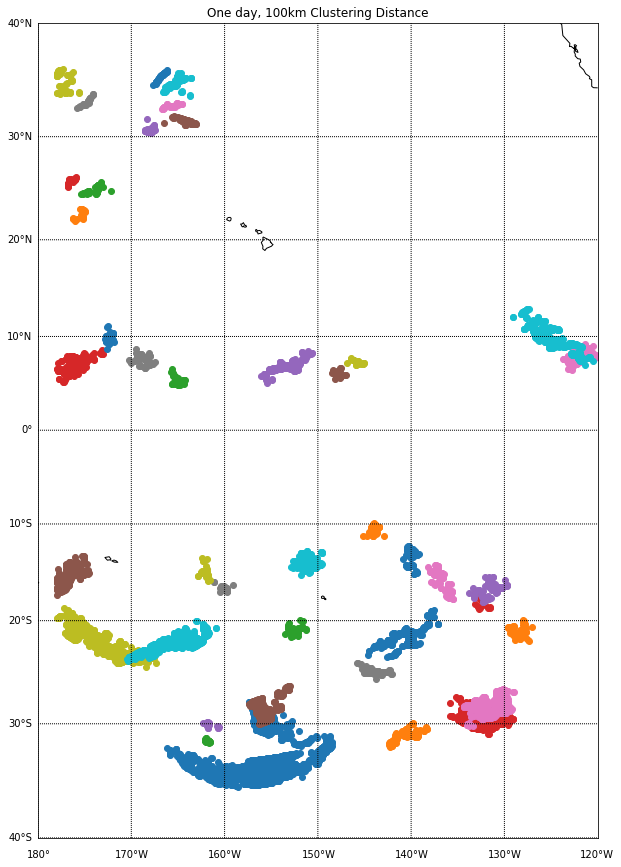

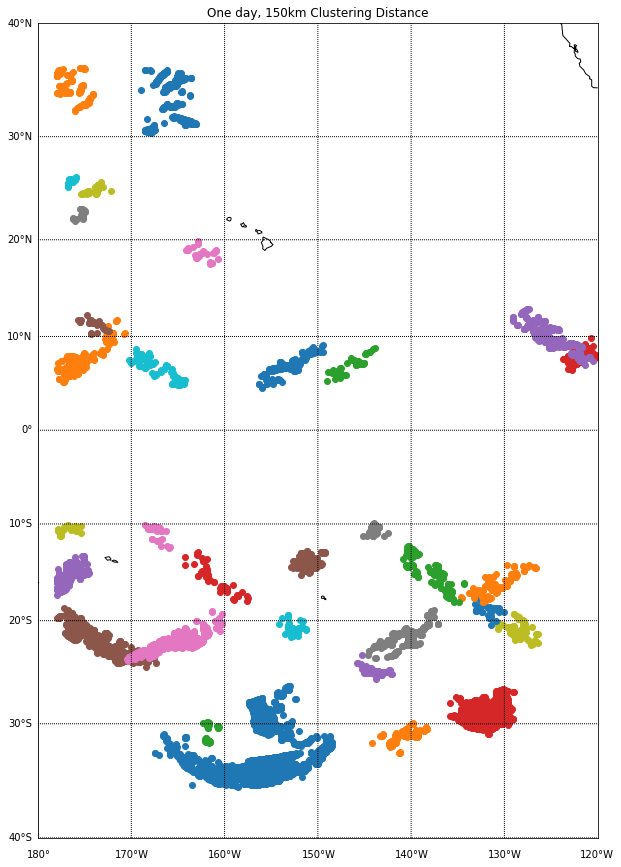

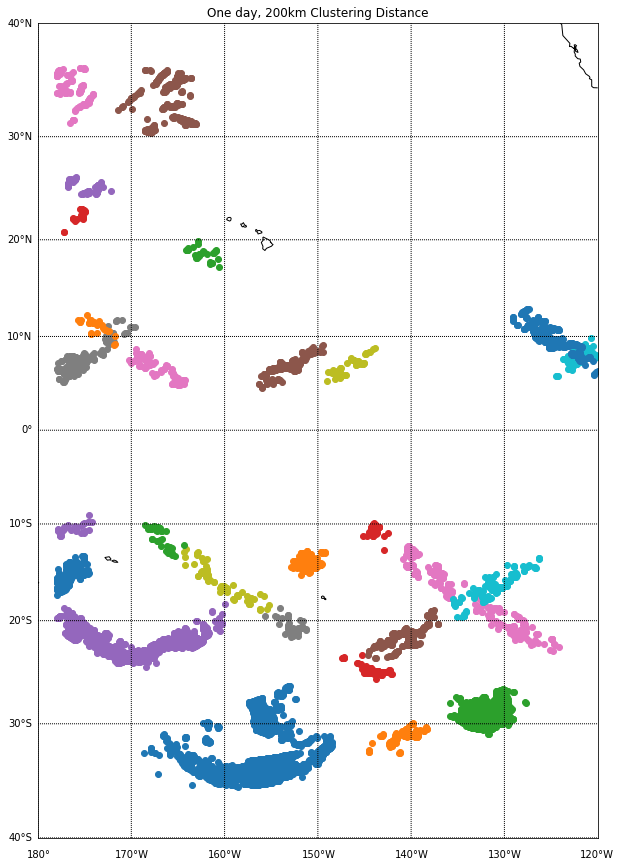

In [228]:
# Plot a few events
time_desired = 300

# 50km
x_temp = np.swapaxes(event50_lon, 0, 1)
y_temp = np.swapaxes(event50_lat, 0, 1)
time_temp = event50_time_mean
npixels = np.size(x_temp,0)
condition = abs(time_desired - time_temp) <= 12
nevents = np.size(np.extract(condition, time_temp), 0)
condition = np.tile(condition, [npixels,1])
x_temp = np.extract(condition, x_temp).reshape(npixels,nevents)
y_temp = np.extract(condition, y_temp).reshape(npixels,nevents)

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
for i in np.arange(nevents):
    lat_temp = y_temp[:,i]
    lon_temp = x_temp[:,i]
    x, y = m(lon_temp, lat_temp)
    m.scatter(x, y)
plt.title('One day, 50km Clustering Distance')

# 100km
x_temp = np.swapaxes(event100_lon, 0, 1)
y_temp = np.swapaxes(event100_lat, 0, 1)
time_temp = event100_time_mean
npixels = np.size(x_temp,0)
condition = abs(time_desired - time_temp) <= 12
nevents = np.size(np.extract(condition, time_temp), 0)
condition = np.tile(condition, [npixels,1])
x_temp = np.extract(condition, x_temp).reshape(npixels,nevents)
y_temp = np.extract(condition, y_temp).reshape(npixels,nevents)

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
for i in np.arange(nevents):
    lat_temp = y_temp[:,i]
    lon_temp = x_temp[:,i]
    x, y = m(lon_temp, lat_temp)
    m.scatter(x, y)
plt.title('One day, 100km Clustering Distance')

# 150km
x_temp = np.swapaxes(event150_lon, 0, 1)
y_temp = np.swapaxes(event150_lat, 0, 1)
time_temp = event150_time_mean
npixels = np.size(x_temp,0)
condition = abs(time_desired - time_temp) <= 12
nevents = np.size(np.extract(condition, time_temp), 0)
condition = np.tile(condition, [npixels,1])
x_temp = np.extract(condition, x_temp).reshape(npixels,nevents)
y_temp = np.extract(condition, y_temp).reshape(npixels,nevents)

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
for i in np.arange(nevents):
    lat_temp = y_temp[:,i]
    lon_temp = x_temp[:,i]
    x, y = m(lon_temp, lat_temp)
    m.scatter(x, y)
plt.title('One day, 150km Clustering Distance')

# 200km
x_temp = np.swapaxes(event200_lon, 0, 1)
y_temp = np.swapaxes(event200_lat, 0, 1)
time_temp = event200_time_mean
npixels = np.size(x_temp,0)
condition = abs(time_desired - time_temp) <= 12
nevents = np.size(np.extract(condition, time_temp), 0)
condition = np.tile(condition, [npixels,1])
x_temp = np.extract(condition, x_temp).reshape(npixels,nevents)
y_temp = np.extract(condition, y_temp).reshape(npixels,nevents)

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=-120.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[0,0,0,1])
for i in np.arange(nevents):
    lat_temp = y_temp[:,i]
    lon_temp = x_temp[:,i]
    x, y = m(lon_temp, lat_temp)
    m.scatter(x, y)
plt.title('One day, 200km Clustering Distance')

In [224]:
time_desired = 300
x_temp = np.swapaxes(event50_lon, 0, 1)
y_temp = np.swapaxes(event50_lat, 0, 1)
time_temp = event50_time_mean
npixels = np.size(x_temp,0)
condition = abs(time_desired - time_temp) <= 12
nevents = np.size(np.extract(condition, time_temp), 0)
condition = np.tile(condition, [npixels,1])
x_temp = np.extract(condition, x_temp).reshape(npixels,nevents)
y_temp = np.extract(condition, y_temp).reshape(npixels,nevents)
print(condition.shape, x_temp.shape, nevents)

(5340, 2427) (5340, 42) 42


2427 1956 1592 1284
5.807123084670561 5.371940685326188 5.204953039841045 5.122976768201472
4182.411461766259 5886.738768698867 7470.892870118348 9372.21672169461


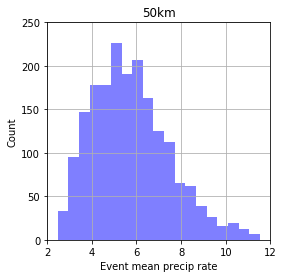

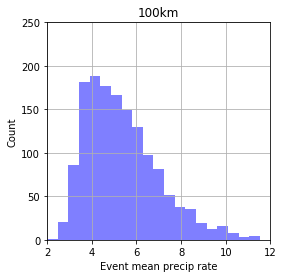

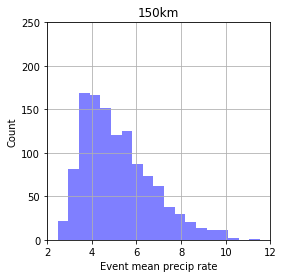

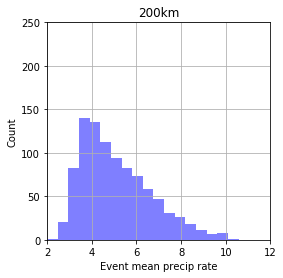

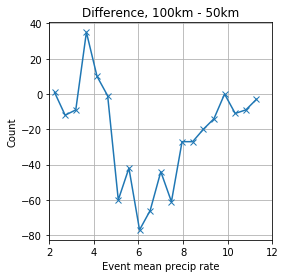

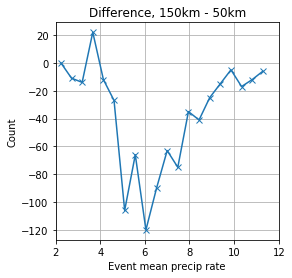

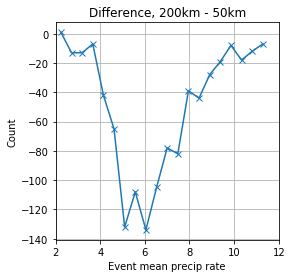

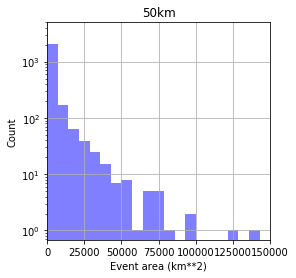

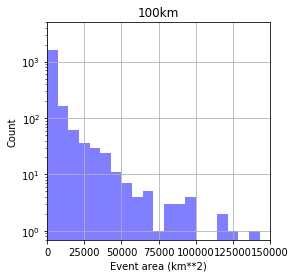

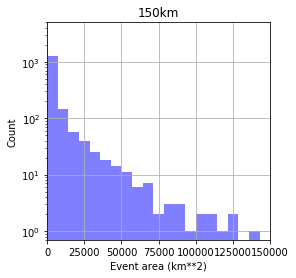

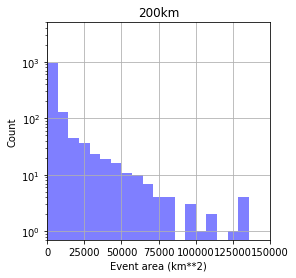

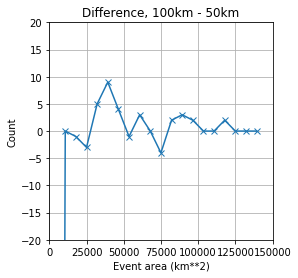

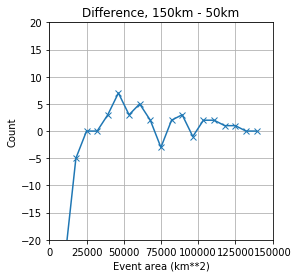

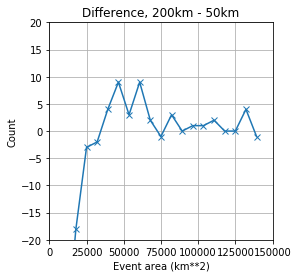

In [101]:
# Plot some histograms
print(np.size(event50_pr_mean), np.size(event100_pr_mean), np.size(event150_pr_mean), np.size(event200_pr_mean))
print(np.nanmean(event50_pr_mean), np.nanmean(event100_pr_mean), np.nanmean(event150_pr_mean), np.nanmean(event200_pr_mean))
print(np.nanmean(event50_area), np.nanmean(event100_area), np.nanmean(event150_area), np.nanmean(event200_area))

nbins = 20
bincount_pr_mean = 250
bincount_area = 5000
pr_mean_min = 2
pr_mean_max = 12
area_min = 0
area_max = 1.5E5

bins_pr_mean = pr_mean_min + (pr_mean_max - pr_mean_min)*np.arange(nbins+1)/(nbins+1)
bins_area = area_min + (area_max - area_min)*np.arange(nbins+1)/(nbins+1)

fig = plt.figure(num=None, figsize=(4, 4) )
n_pr_mean_50, bins_pr_mean, patches = plt.hist(event50_pr_mean, bins=bins_pr_mean, facecolor='blue', alpha=0.5)
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.ylim(0, bincount_pr_mean)
plt.title('50km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_pr_mean_100, bins_pr_mean, patches = plt.hist(event100_pr_mean, bins=bins_pr_mean, facecolor='blue', alpha=0.5)
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.ylim(0, bincount_pr_mean)
plt.title('100km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_pr_mean_150, bins_pr_mean, patches = plt.hist(event150_pr_mean, bins=bins_pr_mean, facecolor='blue', alpha=0.5)
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.ylim(0, bincount_pr_mean)
plt.title('150km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_pr_mean_200, bins_pr_mean, patches = plt.hist(event200_pr_mean, bins=bins_pr_mean, facecolor='blue', alpha=0.5)
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.ylim(0, bincount_pr_mean)
plt.title('200km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
plt.plot(0.5*(bins_pr_mean[1:]+bins_pr_mean[:-1]), n_pr_mean_100 - n_pr_mean_50, '-x')
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.title('Difference, 100km - 50km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
plt.plot(0.5*(bins_pr_mean[1:]+bins_pr_mean[:-1]), n_pr_mean_150 - n_pr_mean_50, '-x')
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.title('Difference, 150km - 50km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
plt.plot(0.5*(bins_pr_mean[1:]+bins_pr_mean[:-1]), n_pr_mean_200 - n_pr_mean_50, '-x')
plt.grid()
plt.xlim(pr_mean_min, pr_mean_max)
plt.title('Difference, 200km - 50km')
plt.xlabel('Event mean precip rate')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_area_50, bins_area, patches = plt.hist(event50_area, bins=bins_area, facecolor='blue', alpha=0.5, log=True)
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(0, bincount_area)
plt.title('50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_area_100, bins_area, patches = plt.hist(event100_area, bins=bins_area, facecolor='blue', alpha=0.5, log=True)
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(0, bincount_area)
plt.title('100km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_area_150, bins_area, patches = plt.hist(event150_area, bins=bins_area, facecolor='blue', alpha=0.5, log=True)
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(0, bincount_area)
plt.title('150km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
n_area_200, bins_area, patches = plt.hist(event200_area, bins=bins_area, facecolor='blue', alpha=0.5, log=True)
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(0, bincount_area)
plt.title('200km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
plt.plot(0.5*(bins_area[1:]+bins_area[:-1]), n_area_100 - n_area_50, '-x')
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(-20, 20)
plt.title('Difference, 100km - 50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
plt.plot(0.5*(bins_area[1:]+bins_area[:-1]), n_area_150 - n_area_50, '-x')
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(-20, 20)
plt.title('Difference, 150km - 50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

fig = plt.figure(num=None, figsize=(4, 4) )
plt.plot(0.5*(bins_area[1:]+bins_area[:-1]), n_area_200 - n_area_50, '-x')
plt.grid()
plt.xlim(area_min, area_max)
plt.ylim(-20, 20)
plt.title('Difference, 200km - 50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Count');

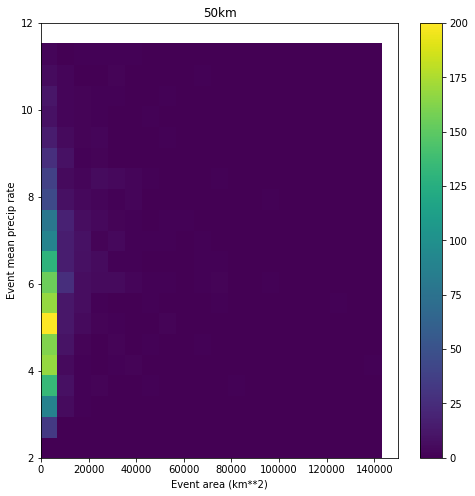

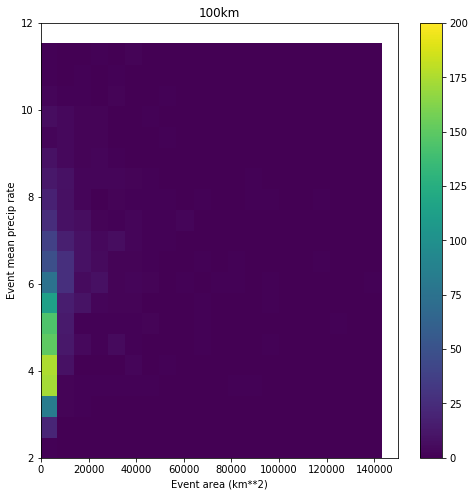

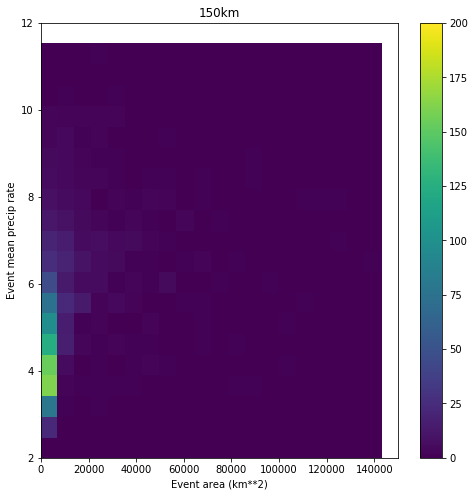

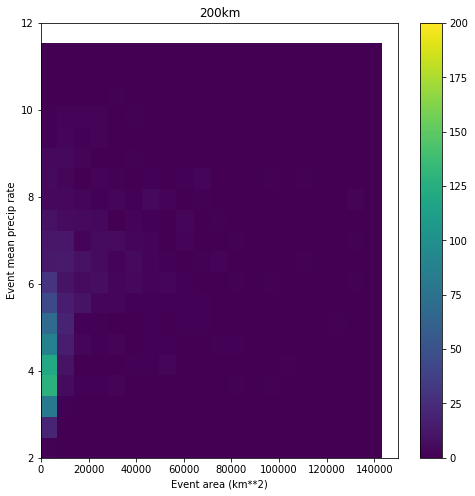

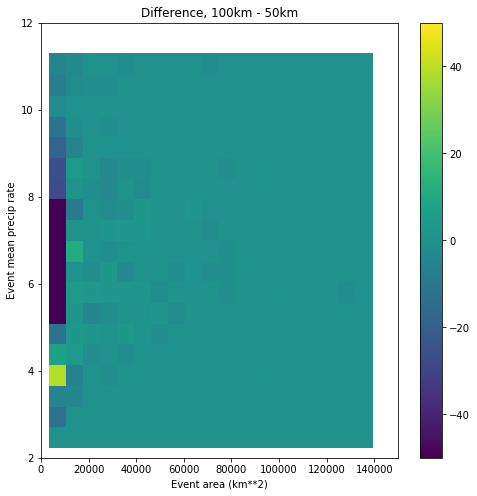

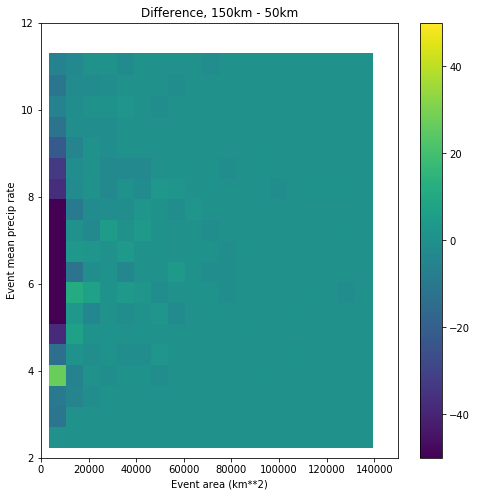

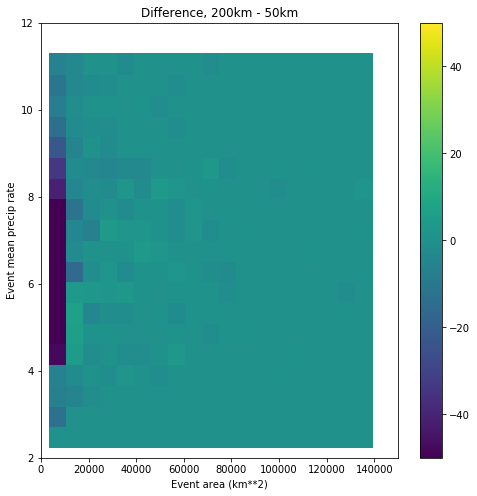

In [140]:
# Make some 2d histograms
nbins = 20
bincount_pr_mean = 250
bincount_area = 5000
pr_mean_min = 2
pr_mean_max = 12
area_min = 0
area_max = 1.5E5

bins_pr_mean = pr_mean_min + (pr_mean_max - pr_mean_min)*np.arange(nbins+1)/(nbins+1)
bins_area = area_min + (area_max - area_min)*np.arange(nbins+1)/(nbins+1)

fig = plt.figure(num=None, figsize=(8, 8) )
n_50 = plt.hist2d(event50_area, event50_pr_mean, bins=[bins_area,bins_pr_mean])
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(0, 200)
plt.title('50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n_100 = plt.hist2d(event100_area, event100_pr_mean, bins=[bins_area,bins_pr_mean])
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(0, 200)
plt.title('100km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n_150 = plt.hist2d(event150_area, event150_pr_mean, bins=[bins_area,bins_pr_mean])
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(0, 200)
plt.title('150km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n_200 = plt.hist2d(event200_area, event200_pr_mean, bins=[bins_area,bins_pr_mean])
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(0, 200)
plt.title('200km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
temp = np.swapaxes(n_100[0] - n_50[0], 0, 1)
plt.pcolor(0.5*(bins_area[1:]+bins_area[:-1]), 0.5*(bins_pr_mean[1:]+bins_pr_mean[:-1]), temp)
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(-50, 50)
plt.title('Difference, 100km - 50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
temp = np.swapaxes(n_150[0] - n_50[0], 0, 1)
plt.pcolor(0.5*(bins_area[1:]+bins_area[:-1]), 0.5*(bins_pr_mean[1:]+bins_pr_mean[:-1]), temp)
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(-50, 50)
plt.title('Difference, 150km - 50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
temp = np.swapaxes(n_200[0] - n_50[0], 0, 1)
plt.pcolor(0.5*(bins_area[1:]+bins_area[:-1]), 0.5*(bins_pr_mean[1:]+bins_pr_mean[:-1]), temp)
plt.xlim(area_min, area_max)
plt.ylim(pr_mean_min, pr_mean_max)
plt.clim(-50, 50)
plt.title('Difference, 200km - 50km')
plt.xlabel('Event area (km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();